## Imports and Utils

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import sem, t
import os
import re

In [2]:
def values_dict_to_list(dict):
    sorted_f1_scores = sorted(dict.items(), key=lambda x: int(x[0].split('x')[0]) * int(x[0].split('x')[1]))
    list = [f1_score[0] for _, f1_score in sorted_f1_scores]
    return list

def get_limits(start, end, num_limits):
    step_size = (end - start) / (num_limits + 1)

    limits = []
    for i in range(1, num_limits + 1):
        limit = start + i * step_size
        limits.append(int(limit))

    return limits

## Data Division with Test Start, Mid and End

### Functions

In [3]:
def show_data_division(size_x=192,size_y=192):
    total_area=782*590


    inicio_area_livre_x=size_x+80
    fim_area_livre_x=782
    meio_area_livre_x=(fim_area_livre_x-inicio_area_livre_x)/2 + inicio_area_livre_x
    inicio_area_livre_y=size_y+80
    fim_area_livre_y=590
    meio_area_livre_y=(fim_area_livre_y-inicio_area_livre_y)/2 + inicio_area_livre_y

    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    plt.grid(False)

    ax.imshow(np.ones([782,590]), cmap='gray', alpha=0.5)

    # Train data
    print("Train Area:",  str(size_y * size_x / total_area))
    rect = patches.Rectangle((0, 0), size_y, size_x, linewidth=2, edgecolor='g', facecolor='g', alpha=0.5)
    ax.add_patch(rect)

    # Validation data
    val_area=size_y*80+size_x*80+80*80
    print("Validation Area:", str(val_area/ total_area))
    rect = patches.Rectangle((size_y, 0), 80, size_x, linewidth=2, edgecolor='none', facecolor='b', alpha=0.5)
    ax.add_patch(rect)

    rect = patches.Rectangle((0, size_x), size_y+80, 80, linewidth=2, edgecolor='none', facecolor='b', alpha=0.5)
    ax.add_patch(rect)


    end_test_start_x=fim_area_livre_x-80
    end_test_start_y=fim_area_livre_y-80
    end_test_end_y=fim_area_livre_y

    start_test_start_x=inicio_area_livre_x
    start_test_start_y=inicio_area_livre_y
    start_test_end_y=inicio_area_livre_y+80

    mid_test_start_x=meio_area_livre_x-40
    mid_test_start_y=meio_area_livre_y-40
    mid_test_end_y=meio_area_livre_y+40

    # Test data end position
    test_end_area=end_test_start_x*80 + end_test_start_y*80 + 80*80
    print("Test End Area:", str(test_end_area / total_area))
    rect = patches.Rectangle((end_test_start_y, 0), 80, end_test_start_x, linewidth=2, edgecolor='none', facecolor='r', alpha=0.5)
    ax.add_patch(rect)

    rect = patches.Rectangle((0, end_test_start_x), end_test_end_y, 80, linewidth=2, edgecolor='none', facecolor='r', alpha=0.5)
    ax.add_patch(rect)



    # Test data start position
    test_start_area=start_test_start_x*80 + start_test_start_y*80 + 80*80
    print("Test Start Area:", str(test_start_area / total_area))
    rect = patches.Rectangle((start_test_start_y, 0), 80, start_test_start_x, linewidth=2, edgecolor='none', facecolor='purple', alpha=0.5)
    ax.add_patch(rect)

    rect = patches.Rectangle((0, start_test_start_x), start_test_end_y, 80, linewidth=2, edgecolor='none', facecolor='purple', alpha=0.5)
    ax.add_patch(rect)



    # Test data mid position
    test_mid_area=mid_test_start_x*80 + mid_test_start_y*80 + 80*80
    print("Test Mid Area:", str(test_mid_area / total_area))
    rect = patches.Rectangle((mid_test_start_y, 0), 80, mid_test_start_x, linewidth=2, edgecolor='none', facecolor='yellow', alpha=0.5)
    ax.add_patch(rect)

    rect = patches.Rectangle((0, mid_test_start_x), mid_test_end_y, 80, linewidth=2, edgecolor='none', facecolor='yellow', alpha=0.5)
    ax.add_patch(rect)


    # Add legend
    train_patch = patches.Patch(color='g', label='Training')
    val_patch = patches.Patch(color='b', label='Validation')
    start_test_patch = patches.Patch(color='r', label='Test End')
    mid_test_patch = patches.Patch(color='purple', label='Test Start')
    end_test_patch = patches.Patch(color='yellow', label='Test Mid')


    ax.legend(handles=[train_patch, val_patch, start_test_patch, mid_test_patch, end_test_patch], loc='upper right')

    ax.set_xlim(0, 590)
    ax.set_ylim(782, 0)
    ax.set_title('Data Division')
    plt.show()

In [4]:
def data_division_proportion(size_x,size_y):
    total_area=782*590
    inicio_area_livre_x=size_x+80
    fim_area_livre_x=782
    meio_area_livre_x=(fim_area_livre_x-inicio_area_livre_x)/2 + inicio_area_livre_x
    inicio_area_livre_y=size_y+80
    fim_area_livre_y=590
    meio_area_livre_y=(fim_area_livre_y-inicio_area_livre_y)/2 + inicio_area_livre_y

    train_percent=size_y * size_x / total_area

    val_area=size_y*80+size_x*80+80*80
    val_percent=val_area/ total_area

    end_test_start_x=fim_area_livre_x-80
    end_test_start_y=fim_area_livre_y-80
    start_test_start_x=inicio_area_livre_x
    start_test_start_y=inicio_area_livre_y
    mid_test_start_x=meio_area_livre_x-40
    mid_test_start_y=meio_area_livre_y-40
    

    # Test data start position
    test_start_area=start_test_start_x*80 + start_test_start_y*80 + 80*80
    test_start_percent=test_start_area / total_area
    # Test data mid position
    test_mid_area=mid_test_start_x*80 + mid_test_start_y*80 + 80*80
    test_mid_percent=test_mid_area / total_area
    # Test data end position
    test_end_area=end_test_start_x*80 + end_test_start_y*80 + 80*80
    test_end_percent=test_end_area / total_area

    return train_percent,val_percent, test_start_percent, test_mid_percent, test_end_percent

In [5]:
# Define the path to your directory containing the files
directory_path = '/home/nunes/Seismic_Analysis_Tensorflow/results/training_size_variation_parihaka/tables'

# Initialize dictionaries to store the F1 scores for each area and position
f1_scores_start_dict = {}
f1_scores_start_2_dict = {}
f1_scores_start_3_dict = {}

f1_scores_mid_dict = {}
f1_scores_mid_2_dict = {}
f1_scores_mid_3_dict = {}

f1_scores_end_dict = {}
f1_scores_end_2_dict = {}
f1_scores_end_3_dict = {}

# Iterate over all files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith(".txt"):
        # Construct the full path to the file
        file_path = os.path.join(directory_path, filename)
        
        # Extract the area, position, and version (if any) from the filename
        match = re.match(r'table_(\d+x\d+)_(start|mid|end)(_?\d*)\.txt', filename)
        if match:
            area = match.group(1)
            position = match.group(2)
            version = match.group(3)

            # Read the file and search for the line containing "Macro F1"
            with open(file_path, 'r') as file:
                for line in file:
                    if 'Macro F1' in line:
                        # Extract the F1 score value
                        f1_value = float(line.split()[2])
                        
                        # Append the value to the corresponding list based on position and version
                        if position == 'start':
                            if version == '':
                                f1_scores_start_dict.setdefault(area, []).append(f1_value)
                            elif version == '_2':
                                f1_scores_start_2_dict.setdefault(area, []).append(f1_value)
                            elif version == '_3':
                                f1_scores_start_3_dict.setdefault(area, []).append(f1_value)
                        elif position == 'mid':
                            if version == '':
                                f1_scores_mid_dict.setdefault(area, []).append(f1_value)
                            elif version == '_2':
                                f1_scores_mid_2_dict.setdefault(area, []).append(f1_value)
                            elif version == '_3':
                                f1_scores_mid_3_dict.setdefault(area, []).append(f1_value)
                        elif position == 'end':
                            if version == '':
                                f1_scores_end_dict.setdefault(area, []).append(f1_value)
                            elif version == '_2':
                                f1_scores_end_2_dict.setdefault(area, []).append(f1_value)
                            elif version == '_3':
                                f1_scores_end_3_dict.setdefault(area, []).append(f1_value)


In [6]:
# Define the path to your directory containing the files
directory_path = '/home/nunes/Seismic_Analysis_Tensorflow/results/training_size_variation_parihaka/tables'

# Initialize dictionaries to store the acc scores for each area and position
acc_scores_start_dict = {}
acc_scores_start_2_dict = {}
acc_scores_start_3_dict = {}

acc_scores_mid_dict = {}
acc_scores_mid_2_dict = {}
acc_scores_mid_3_dict = {}

acc_scores_end_dict = {}
acc_scores_end_2_dict = {}
acc_scores_end_3_dict = {}

# Iterate over all files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith(".txt"):
        # Construct the full path to the file
        file_path = os.path.join(directory_path, filename)
        
        # Extract the area, position, and version (if any) from the filename
        match = re.match(r'table_(\d+x\d+)_(start|mid|end)(_?\d*)\.txt', filename)
        if match:
            area = match.group(1)
            position = match.group(2)
            version = match.group(3)

            # Read the file and search for the line containing Micro F1"
            with open(file_path, 'r') as file:
                for line in file:
                    if 'Micro F1' in line:
                        # Extract the acc score value
                        acc_value = float(line.split()[2])
                        
                        # Append the value to the corresponding list based on position and version
                        if position == 'start':
                            if version == '':
                                acc_scores_start_dict.setdefault(area, []).append(acc_value)
                            elif version == '_2':
                                acc_scores_start_2_dict.setdefault(area, []).append(acc_value)
                            elif version == '_3':
                                acc_scores_start_3_dict.setdefault(area, []).append(acc_value)
                        elif position == 'mid':
                            if version == '':
                                acc_scores_mid_dict.setdefault(area, []).append(acc_value)
                            elif version == '_2':
                                acc_scores_mid_2_dict.setdefault(area, []).append(acc_value)
                            elif version == '_3':
                                acc_scores_mid_3_dict.setdefault(area, []).append(acc_value)
                        elif position == 'end':
                            if version == '':
                                acc_scores_end_dict.setdefault(area, []).append(acc_value)
                            elif version == '_2':
                                acc_scores_end_2_dict.setdefault(area, []).append(acc_value)
                            elif version == '_3':
                                acc_scores_end_3_dict.setdefault(area, []).append(acc_value)

In [7]:
def mean_confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    se = sem(data)
    h = se * t.ppf((1 + confidence) / 2., n-1)
    return mean, mean-h, mean+h

In [8]:
# Listas de áreas
areas = ['192x192', '235x216', '278x240', '321x264', '364x288', '407x312', '450x336', '493x360', '536x384','579x408','622x430']
areas_numerical = [int(area.split('x')[0]) * int(area.split('x')[1]) for area in areas]

# Três diferentes listas de F1 scores para cada posição
f1_score_start_1 = values_dict_to_list(f1_scores_start_dict) + [0.763]
f1_score_start_2 = values_dict_to_list(f1_scores_start_2_dict) + [0.759]
f1_score_start_3 = values_dict_to_list(f1_scores_start_3_dict) + [0.763]

f1_score_mid_1 = values_dict_to_list(f1_scores_mid_dict) + [0.763]
f1_score_mid_2 = values_dict_to_list(f1_scores_mid_2_dict) + [0.759]
f1_score_mid_3 = values_dict_to_list(f1_scores_mid_3_dict) + [0.763]

f1_score_end_1 = values_dict_to_list(f1_scores_end_dict) + [0.763]
f1_score_end_2 = values_dict_to_list(f1_scores_end_2_dict) + [0.759]
f1_score_end_3 = values_dict_to_list(f1_scores_end_3_dict) + [0.763]


# Três diferentes listas de acc scores para cada posição
acc_score_start_1 = values_dict_to_list(acc_scores_start_dict) + [0.896]
acc_score_start_2 = values_dict_to_list(acc_scores_start_2_dict) + [0.897]
acc_score_start_3 = values_dict_to_list(acc_scores_start_3_dict) + [0.892]

acc_score_mid_1 = values_dict_to_list(acc_scores_mid_dict) + [0.896]
acc_score_mid_2 = values_dict_to_list(acc_scores_mid_2_dict) + [0.897]
acc_score_mid_3 = values_dict_to_list(acc_scores_mid_3_dict) + [0.892]

acc_score_end_1 = values_dict_to_list(acc_scores_end_dict) + [0.896]
acc_score_end_2 = values_dict_to_list(acc_scores_end_2_dict) + [0.897]
acc_score_end_3 = values_dict_to_list(acc_scores_end_3_dict) + [0.892]



f1_scores_start = [mean_confidence_interval([f1_score_start_1[i], f1_score_start_2[i], f1_score_start_3[i]]) for i in range(len(f1_score_start_1))]
f1_scores_mid = [mean_confidence_interval([f1_score_mid_1[i], f1_score_mid_2[i], f1_score_mid_3[i]]) for i in range(len(f1_score_mid_1))]
f1_scores_end = [mean_confidence_interval([f1_score_end_1[i], f1_score_end_2[i], f1_score_end_3[i]]) for i in range(len(f1_score_end_1))]


acc_scores_start = [mean_confidence_interval([acc_score_start_1[i], acc_score_start_2[i], acc_score_start_3[i]]) for i in range(len(acc_score_start_1))]
acc_scores_mid = [mean_confidence_interval([acc_score_mid_1[i], acc_score_mid_2[i], acc_score_mid_3[i]]) for i in range(len(acc_score_mid_1))]
acc_scores_end = [mean_confidence_interval([acc_score_end_1[i], acc_score_end_2[i], acc_score_end_3[i]]) for i in range(len(acc_score_end_1))]


In [9]:
def data_division_f1_graph():
    # Configurando o estilo do gráfico
    sns.set(style="whitegrid")

    # Criando o gráfico de linha
    plt.figure(figsize=(30, 12))

    # Plotando as três listas de F1 scores com intervalos de confiança
    plt.errorbar(areas_numerical, [x[0] for x in f1_scores_start], 
                yerr=[[x[0]-x[1] for x in f1_scores_start], [x[2]-x[0] for x in f1_scores_start]], 
                fmt='-o', color='b', label='Start')

    plt.errorbar(areas_numerical, [x[0] for x in f1_scores_mid], 
                yerr=[[x[0]-x[1] for x in f1_scores_mid], [x[2]-x[0] for x in f1_scores_mid]], 
                fmt='-o', color='g', label='Mid')

    plt.errorbar(areas_numerical, [x[0] for x in f1_scores_end], 
                yerr=[[x[0]-x[1] for x in f1_scores_end], [x[2]-x[0] for x in f1_scores_end]], 
                fmt='-o', color='r', label='End')

    # Adicionando os valores ao lado de cada ponto
    for i in range(len(areas_numerical)):
        mean_start, lower_start, upper_start = f1_scores_start[i]
        mean_mid, lower_mid, upper_mid = f1_scores_mid[i]
        mean_end, lower_end, upper_end = f1_scores_end[i]

        plt.text(areas_numerical[i], mean_start, f'{mean_start:.3f}±{upper_start-mean_start:.3f}', fontsize=18, ha='left', color='b')
        plt.text(areas_numerical[i], mean_mid, f'{mean_mid:.3f}±{upper_mid-mean_mid:.3f}', fontsize=18, ha='left', color='g')
        plt.text(areas_numerical[i], mean_end, f'{mean_end:.3f}±{upper_end-mean_end:.3f}', fontsize=18, ha='left', color='r')

    # Ajustando os labels do eixo x para mostrar as áreas originais
    plt.xticks(areas_numerical, areas)

    # Títulos e labels
    plt.title('Relação entre a Área de Treino e F1 score com Intervalos de Confiança')
    plt.xlabel('Área de Treino (Dimensões Originais)')
    plt.ylabel('F1 Score')

    # Adicionando legenda
    plt.legend()

    # Exibindo o gráfico
    plt.show()

In [10]:
def data_division_acc_graph():
        
    # Configurando o estilo do gráfico
    sns.set(style="whitegrid")

    # Criando o gráfico de linha
    plt.figure(figsize=(30, 12))

    # Plotando as três listas de acc scores com intervalos de confiança
    plt.errorbar(areas_numerical, [x[0] for x in acc_scores_start], 
                yerr=[[x[0]-x[1] for x in acc_scores_start], [x[2]-x[0] for x in acc_scores_start]], 
                fmt='-o', color='b', label='Start')

    plt.errorbar(areas_numerical, [x[0] for x in acc_scores_mid], 
                yerr=[[x[0]-x[1] for x in acc_scores_mid], [x[2]-x[0] for x in acc_scores_mid]], 
                fmt='-o', color='g', label='Mid')

    plt.errorbar(areas_numerical, [x[0] for x in acc_scores_end], 
                yerr=[[x[0]-x[1] for x in acc_scores_end], [x[2]-x[0] for x in acc_scores_end]], 
                fmt='-o', color='r', label='End')

    # Adicionando os valores ao lado de cada ponto
    for i in range(len(areas_numerical)):
        mean_start, lower_start, upper_start = acc_scores_start[i]
        mean_mid, lower_mid, upper_mid = acc_scores_mid[i]
        mean_end, lower_end, upper_end = acc_scores_end[i]

        plt.text(areas_numerical[i], mean_start, f'{mean_start:.3f}±{upper_start-mean_start:.3f}', fontsize=18, ha='left', color='b')
        plt.text(areas_numerical[i], mean_mid, f'{mean_mid:.3f}±{upper_mid-mean_mid:.3f}', fontsize=18, ha='left', color='g')
        plt.text(areas_numerical[i], mean_end, f'{mean_end:.3f}±{upper_end-mean_end:.3f}', fontsize=18, ha='left', color='r')

    # Ajustando os labels do eixo x para mostrar as áreas originais
    plt.xticks(areas_numerical, areas)
    # Ajustando os labels do eixo x para mostrar as áreas originais
    plt.xticks(areas_numerical, areas)

    # Títulos e labels
    plt.title('Relação entre a Área de Treino e Acurácia para Diferentes Áreas de Treino e Teste')
    plt.xlabel('Área de Treino (Dimensões Originais)')
    plt.ylabel('Acurácia')

    # Adicionando legenda
    plt.legend()

    # Exibindo o gráfico
    plt.show()


In [11]:
def display_pos_table(areas, f1_scores_start, f1_scores_mid, f1_scores_end):
    # Create a dictionary to store the table data
    table_data = {
        'Position': ['Start', 'Mid', 'End']
    }
    
    # Loop through each area and add the corresponding data to the dictionary
    for i, area in enumerate(areas):
        start_mean, start_lower, start_upper = f1_scores_start[i]
        mid_mean, mid_lower, mid_upper = f1_scores_mid[i]
        end_mean, end_lower, end_upper = f1_scores_end[i]
        
        table_data[area] = [
            f'{start_mean:.3f} ± {start_upper-start_mean:.3f}',
            f'{mid_mean:.3f} ± {mid_upper-mid_mean:.3f}',
            f'{end_mean:.3f} ± {end_upper-end_mean:.3f}'
        ]
    
    # Convert the dictionary to a pandas DataFrame
    df = pd.DataFrame(table_data)
    
    # Display the table
    return df

### Results

Train Area: 0.18726429407429884
Validation Area: 0.11617321947201872
Test End Area: 0.22402358142962417
Test Start Area: 0.14391607785339633
Test Mid Area: 0.18396982964151026


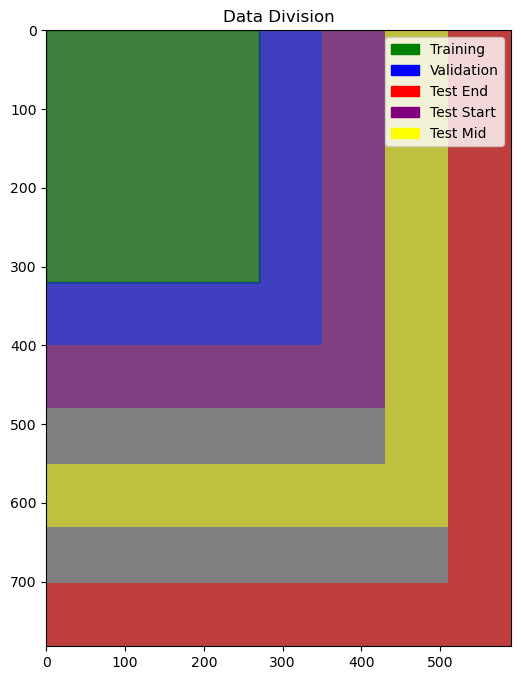

In [12]:
sizetrainx=320
sizetrainy=270
show_data_division(sizetrainx,sizetrainy)

In [13]:
sizes = [(192, 192), (235, 216), (278, 240), (321, 264), (364, 288),
         (407, 312), (450, 336), (493, 360), (536, 384), (579, 408), (622, 430)]

# Create a dataframe to store the results
columns = ['Train Area', 'Validation Area', 'Test Start Area', 'Test Mid Area', 'Test End Area']
data = []

# Calculate proportions for each size combination
for size_x, size_y in sizes:
    proportions = data_division_proportion(size_x, size_y)
    data.append(proportions)

# Convert the data to a DataFrame
df = pd.DataFrame(data, index=[f"{x}x{y}" for x, y in sizes], columns=columns)

df

,Train Area,Validation Area,Test Start Area,Test Mid Area,Test End Area
192x192,0.079899,0.080454,0.108197,0.166110,0.224024
235x216,0.110018,0.092072,0.119814,0.171919,0.224024
278x240,0.144610,0.103689,0.131432,0.177728,0.224024
321x264,0.183675,0.115306,0.143049,0.183536,0.224024
364x288,0.227214,0.126924,0.154666,0.189345,0.224024
407x312,0.275226,0.138541,0.166284,0.195154,0.224024
450x336,0.327713,0.150158,0.177901,0.200962,0.224024
493x360,0.384672,0.161776,0.189518,0.206771,0.224024
536x384,0.446105,0.173393,0.201136,0.212580,0.224024
579x408,0.512012,0.185010,0.212753,0.218388,0.224024


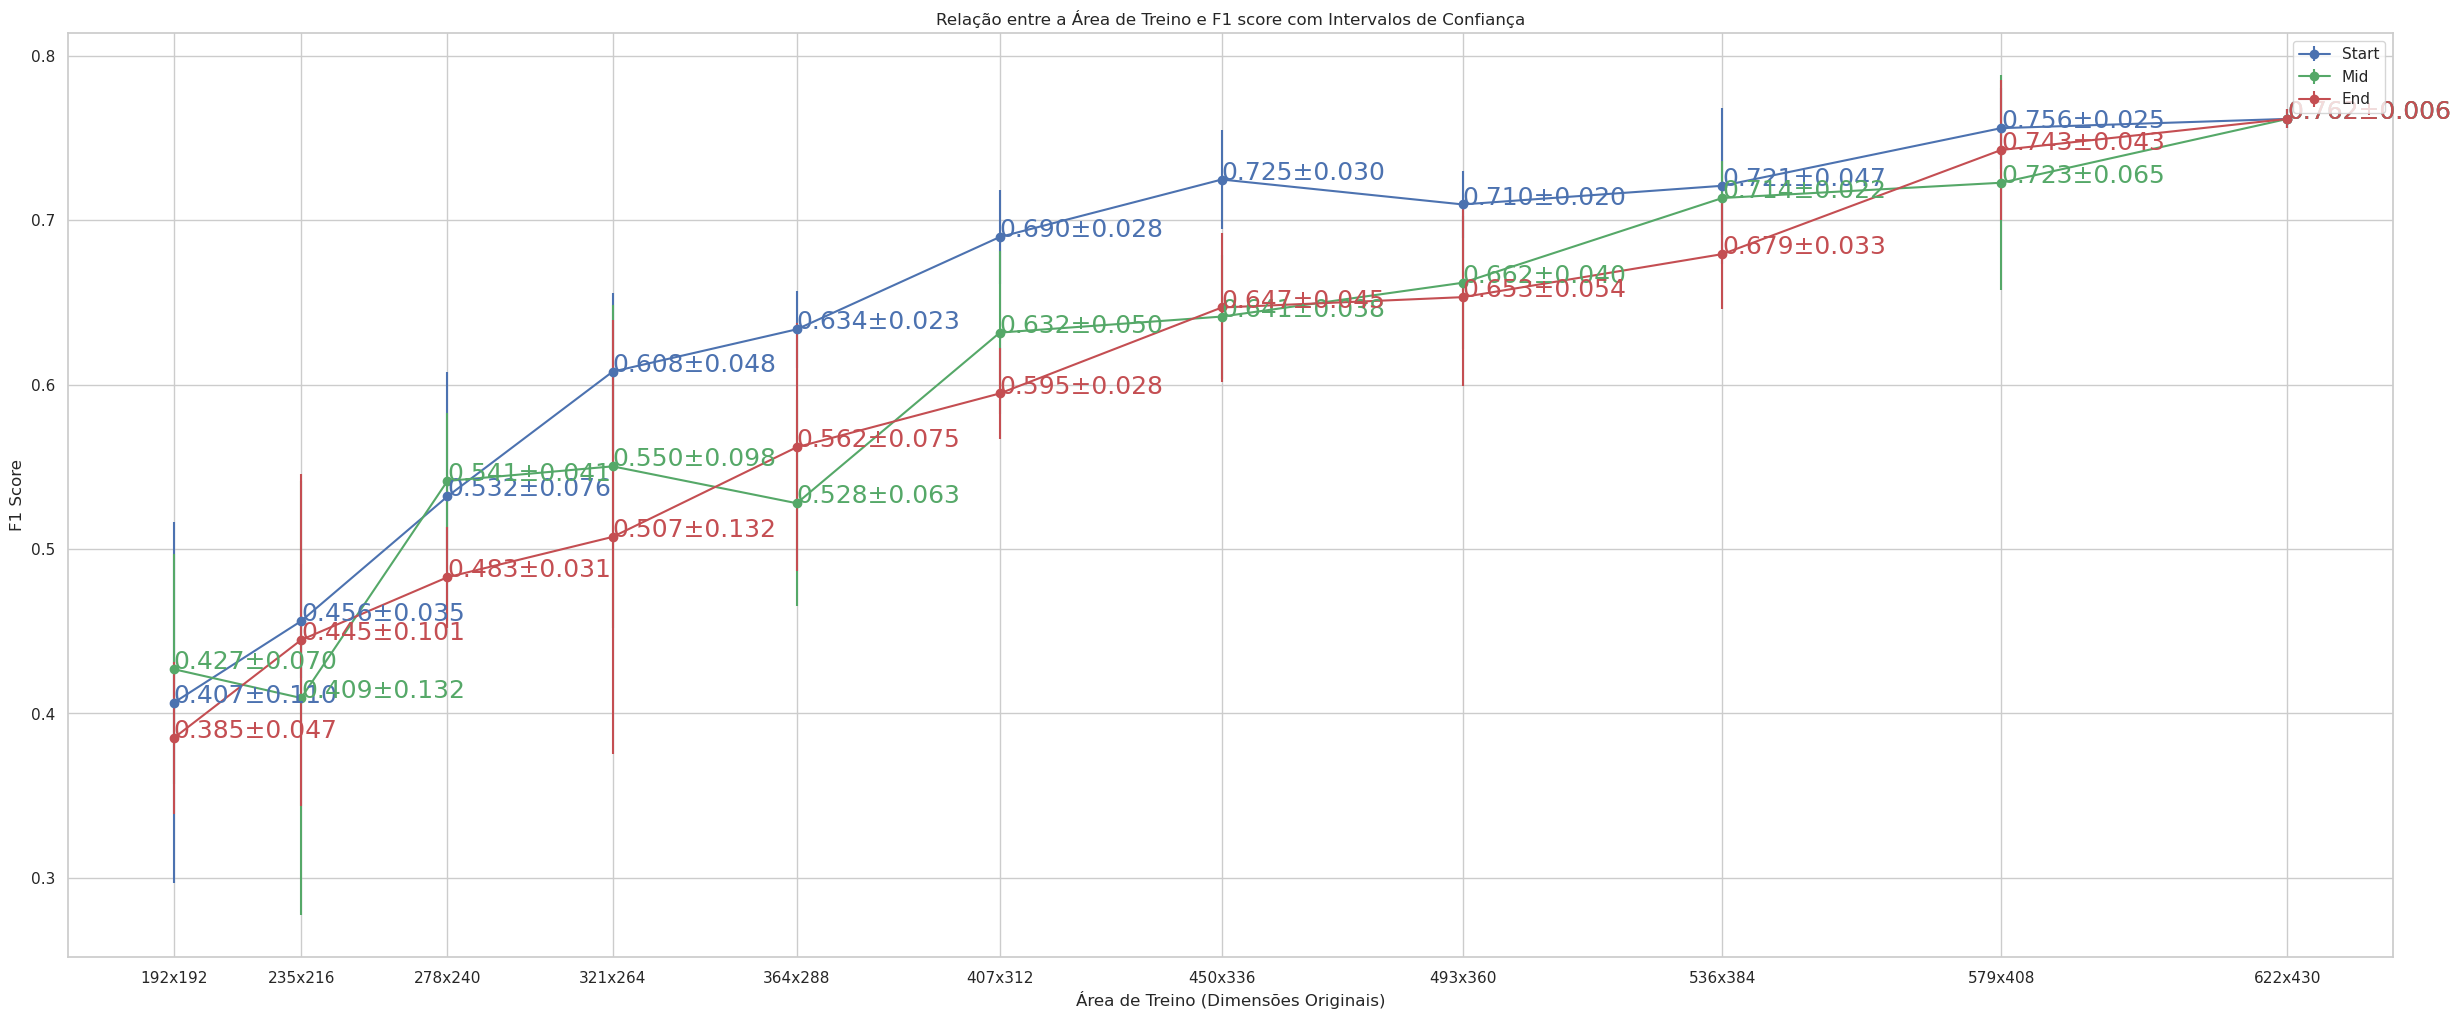

In [14]:
data_division_f1_graph()

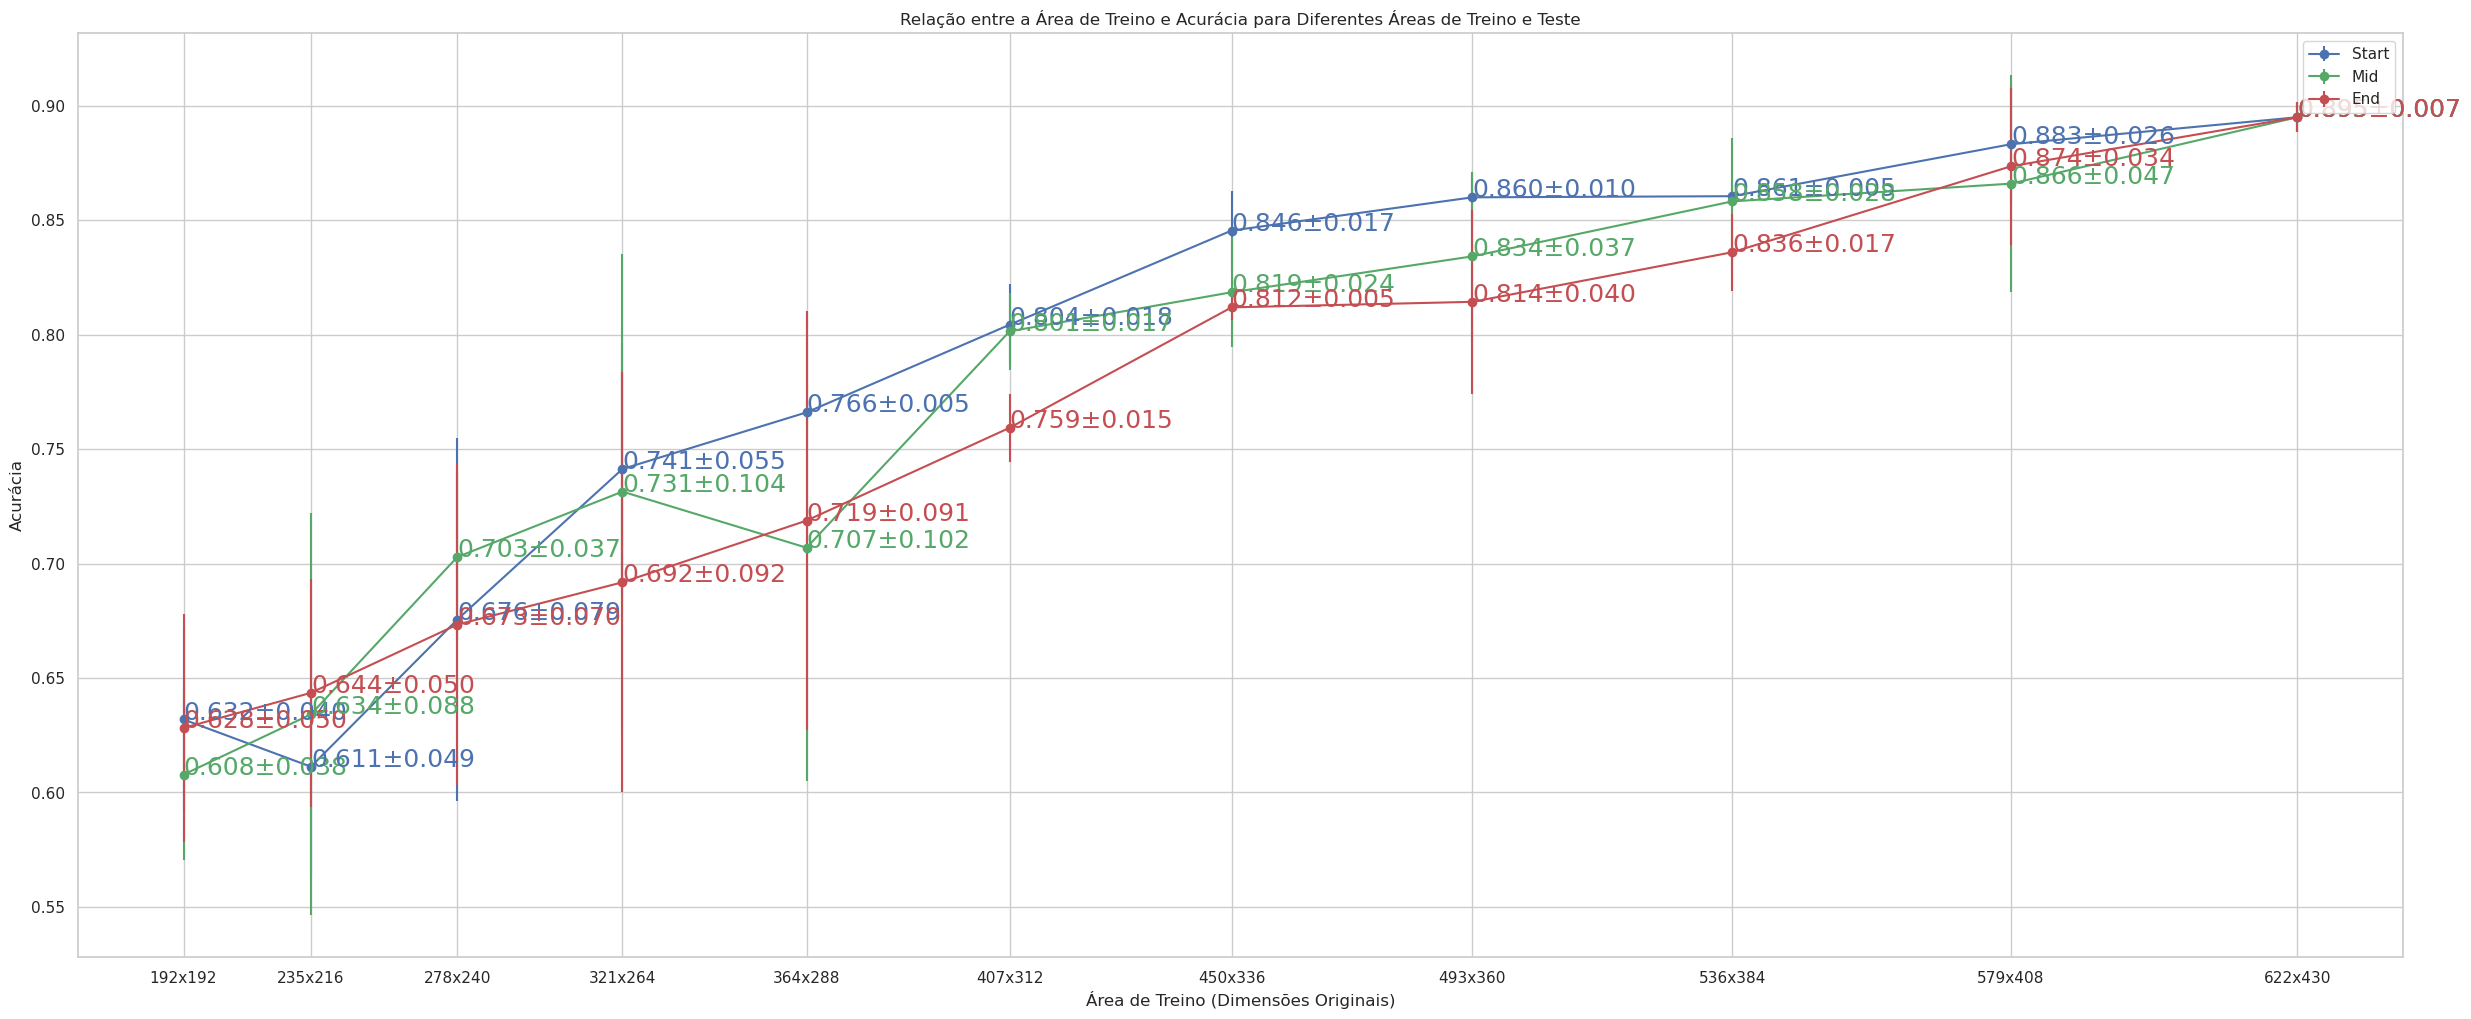

In [15]:
data_division_acc_graph()

In [16]:
table=display_pos_table(areas, f1_scores_start, f1_scores_mid, f1_scores_end)
table

,Position,192x192,235x216,278x240,321x264,364x288,407x312,450x336,493x360,536x384,579x408,622x430
0,Start,0.407 ± 0.110,0.456 ± 0.035,0.532 ± 0.076,0.608 ± 0.048,0.634 ± 0.023,0.690 ± 0.028,0.725 ± 0.030,0.710 ± 0.020,0.721 ± 0.047,0.756 ± 0.025,0.762 ± 0.006
1,Mid,0.427 ± 0.070,0.409 ± 0.132,0.541 ± 0.041,0.550 ± 0.098,0.528 ± 0.063,0.632 ± 0.050,0.641 ± 0.038,0.662 ± 0.040,0.714 ± 0.022,0.723 ± 0.065,0.762 ± 0.006
2,End,0.385 ± 0.047,0.445 ± 0.101,0.483 ± 0.031,0.507 ± 0.132,0.562 ± 0.075,0.595 ± 0.028,0.647 ± 0.045,0.653 ± 0.054,0.679 ± 0.033,0.743 ± 0.043,0.762 ± 0.006


In [17]:
table=display_pos_table(areas, acc_scores_start, acc_scores_mid, acc_scores_end)
table

,Position,192x192,235x216,278x240,321x264,364x288,407x312,450x336,493x360,536x384,579x408,622x430
0,Start,0.632 ± 0.040,0.611 ± 0.049,0.676 ± 0.079,0.741 ± 0.055,0.766 ± 0.005,0.804 ± 0.018,0.846 ± 0.017,0.860 ± 0.010,0.861 ± 0.005,0.883 ± 0.026,0.895 ± 0.007
1,Mid,0.608 ± 0.038,0.634 ± 0.088,0.703 ± 0.037,0.731 ± 0.104,0.707 ± 0.102,0.801 ± 0.017,0.819 ± 0.024,0.834 ± 0.037,0.858 ± 0.028,0.866 ± 0.047,0.895 ± 0.007
2,End,0.628 ± 0.050,0.644 ± 0.050,0.673 ± 0.070,0.692 ± 0.092,0.719 ± 0.091,0.759 ± 0.015,0.812 ± 0.005,0.814 ± 0.040,0.836 ± 0.017,0.874 ± 0.034,0.895 ± 0.007


## Data Division Fixed Val and Test

### Functions

In [18]:
def show_data_division_fixed_val_test(size_x=192,size_y=192,max_sizetrain_x=320,max_sizetrain_y=270):
    total_area=782*590
    inicio_area_livre_x=max_sizetrain_x+80
    fim_area_livre_x=782
    meio_area_livre_x=(fim_area_livre_x-inicio_area_livre_x)/2 + inicio_area_livre_x
    inicio_area_livre_y=max_sizetrain_y+80
    fim_area_livre_y=590
    meio_area_livre_y=(fim_area_livre_y-inicio_area_livre_y)/2 + inicio_area_livre_y

    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    plt.grid(False)

    ax.imshow(np.ones([782,590]), cmap='gray', alpha=0.5)

    # Train data
    print("Train Area:",  str(size_y * size_x / total_area))
    rect = patches.Rectangle((0, 0), size_y, size_x, linewidth=2, edgecolor='g', facecolor='g', alpha=0.5)
    ax.add_patch(rect)

    # Validation data
    val_area=max_sizetrain_x*80+max_sizetrain_y*80+80*80
    print("Validation Area:", str(val_area/ total_area))
    rect = patches.Rectangle((max_sizetrain_y, 0), 80, max_sizetrain_x, linewidth=2, edgecolor='none', facecolor='b', alpha=0.5)
    ax.add_patch(rect)

    rect = patches.Rectangle((0, max_sizetrain_x), max_sizetrain_y+80, 80, linewidth=2, edgecolor='none', facecolor='b', alpha=0.5)
    ax.add_patch(rect)



    end_test_start_x=fim_area_livre_x-80
    end_test_start_y=fim_area_livre_y-80
    end_test_end_y=fim_area_livre_y

    start_test_start_x=inicio_area_livre_x
    start_test_start_y=inicio_area_livre_y
    start_test_end_y=inicio_area_livre_y+80

    mid_test_start_x=meio_area_livre_x-40
    mid_test_start_y=meio_area_livre_y-40
    mid_test_end_y=meio_area_livre_y+40


    # Test data end position
    test_end_area=end_test_start_x*80 + end_test_start_y*80 + 80*80
    print("Test End Area:", str(test_end_area / total_area))
    rect = patches.Rectangle((end_test_start_y, 0), 80, end_test_start_x, linewidth=2, edgecolor='none', facecolor='r', alpha=0.5)
    ax.add_patch(rect)

    rect = patches.Rectangle((0, end_test_start_x), end_test_end_y, 80, linewidth=2, edgecolor='none', facecolor='r', alpha=0.5)
    ax.add_patch(rect)



    # Test data start position
    test_start_area=start_test_start_x*80 + start_test_start_y*80 + 80*80
    print("Test Start Area:", str(test_start_area / total_area))
    rect = patches.Rectangle((start_test_start_y, 0), 80, start_test_start_x, linewidth=2, edgecolor='none', facecolor='purple', alpha=0.5)
    ax.add_patch(rect)

    rect = patches.Rectangle((0, start_test_start_x), start_test_end_y, 80, linewidth=2, edgecolor='none', facecolor='purple', alpha=0.5)
    ax.add_patch(rect)



    # Test data mid position
    test_mid_area=mid_test_start_x*80 + mid_test_start_y*80 + 80*80
    print("Test Mid Area:", str(test_mid_area / total_area))
    rect = patches.Rectangle((mid_test_start_y, 0), 80, mid_test_start_x, linewidth=2, edgecolor='none', facecolor='yellow', alpha=0.5)
    ax.add_patch(rect)

    rect = patches.Rectangle((0, mid_test_start_x), mid_test_end_y, 80, linewidth=2, edgecolor='none', facecolor='yellow', alpha=0.5)
    ax.add_patch(rect)


    # Add legend
    train_patch = patches.Patch(color='g', label='Training')
    val_patch = patches.Patch(color='b', label='Validation')
    start_test_patch = patches.Patch(color='r', label='Test End')
    mid_test_patch = patches.Patch(color='purple', label='Test Start')
    end_test_patch = patches.Patch(color='yellow', label='Test Mid')


    ax.legend(handles=[train_patch, val_patch, start_test_patch, mid_test_patch, end_test_patch], loc='upper right')

    ax.set_xlim(0, 590)
    ax.set_ylim(782, 0)
    ax.set_title('Data Division with Train Size ' + str(size_x)+"x"+str(size_y))
    plt.show()

In [19]:
def fixed_val_and_test_f1_graph():
    # Listas de áreas e múltiplas listas de F1 scores
    areas = ['192x192', '224x212', '256x232', '288x252', '320x270']

    # Três diferentes listas de F1 scores

    acc_start = [0.5716,0.6165,0.6350,0.5959,0.7451]
    acc_mid = [0.4995,0.6471,0.6690,0.6485,0.7515]
    acc_end = [0.6457,0.6013,0.7049,0.7202,0.7434]

    f1_start = [0.3800,0.3976,0.4866,0.3650,0.6397]
    f1_mid = [0.2507,0.4106,0.4539,0.4691,0.5787]
    f1_end = [0.3599,0.3963,0.5034,0.5424,0.5648]

    # Convertendo áreas para uma métrica numérica
    areas_numerical = [int(area.split('x')[0]) * int(area.split('x')[1]) for area in areas]

    # Configurando o estilo do gráfico
    sns.set(style="whitegrid")

    # Criando o gráfico de linha
    plt.figure(figsize=(18, 6))

    # Plotando as três listas de F1 scores com cores diferentes
    plt.plot(areas_numerical, f1_start, marker='o', linestyle='-', color='b', label='Start')
    plt.plot(areas_numerical, f1_mid, marker='o', linestyle='-', color='g', label='Mid')
    plt.plot(areas_numerical, f1_end, marker='o', linestyle='-', color='r', label='End')

    # Adicionando os valores de F1 no gráfico para cada linha
    for i, (area, f1_1, f1_2, f1_3) in enumerate(zip(areas_numerical, f1_start, f1_mid, f1_end)):
        plt.text(area, f1_1, f'{f1_1:.4f}', fontsize=12, ha='right', color='b')
        plt.text(area, f1_2, f'{f1_2:.4f}', fontsize=12, ha='right', color='g')
        plt.text(area, f1_3, f'{f1_3:.4f}', fontsize=12, ha='right', color='r')

    # Ajustando os labels do eixo x para mostrar as áreas originais
    plt.xticks(areas_numerical, areas)

    # Títulos e labels
    plt.title('Relação entre a Área de Treino e F1-Score para Diferentes Áreas de Treino e Teste')
    plt.xlabel('Área de Treino (Dimensões Originais)')
    plt.ylabel('F1-Score')

    # Adicionando legenda
    plt.legend()

    # Exibindo o gráfico
    plt.show()

In [20]:
def fixed_val_and_test_acc_graph():
    # Listas de áreas e múltiplas listas de acc scores
    areas = ['192x192', '224x212', '256x232', '288x252', '320x270']

    # Três diferentes listas de acc scores

    acc_start = [0.5716,0.6165,0.6350,0.5959,0.7451]
    acc_mid = [0.4995,0.6471,0.6690,0.6485,0.7515]
    acc_end = [0.6457,0.6013,0.7049,0.7202,0.7434]

    # Convertendo áreas para uma métrica numérica
    areas_numerical = [int(area.split('x')[0]) * int(area.split('x')[1]) for area in areas]

    # Configurando o estilo do gráfico
    sns.set(style="whitegrid")

    # Criando o gráfico de linha
    plt.figure(figsize=(18, 6))

    # Plotando as três listas de acc scores com cores diferentes
    plt.plot(areas_numerical, acc_start, marker='o', linestyle='-', color='b', label='Start')
    plt.plot(areas_numerical, acc_mid, marker='o', linestyle='-', color='g', label='Mid')
    plt.plot(areas_numerical, acc_end, marker='o', linestyle='-', color='r', label='End')

    # Adicionando os valores de acc no gráfico para cada linha
    for i, (area, acc_1, acc_2, acc_3) in enumerate(zip(areas_numerical, acc_start, acc_mid, acc_end)):
        plt.text(area, acc_1, f'{acc_1:.4f}', fontsize=12, ha='right', color='b')
        plt.text(area, acc_2, f'{acc_2:.4f}', fontsize=12, ha='right', color='g')
        plt.text(area, acc_3, f'{acc_3:.4f}', fontsize=12, ha='right', color='r')

    # Ajustando os labels do eixo x para mostrar as áreas originais
    plt.xticks(areas_numerical, areas)

    # Títulos e labels
    plt.title('Relação entre a Área de Treino e Acurácia para Diferentes Áreas de Treino e Teste')
    plt.xlabel('Área de Treino (Dimensões Originais)')
    plt.ylabel('Acurácia')

    # Adicionando legenda
    plt.legend()

    # Exibindo o gráfico
    plt.show()

### Results

Train Area: 0.18726429407429884
Validation Area: 0.11617321947201872
Test End Area: 0.22402358142962417
Test Start Area: 0.14391607785339633
Test Mid Area: 0.18396982964151026


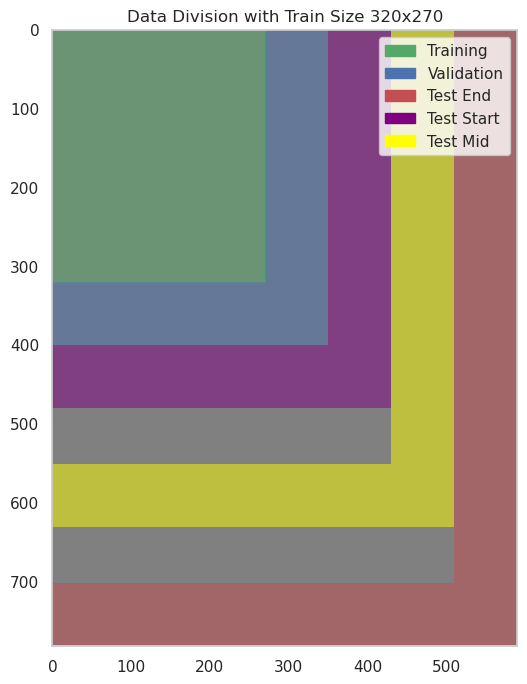

In [21]:
show_data_division_fixed_val_test(size_x=320,size_y=270,max_sizetrain_x=320,max_sizetrain_y=270)

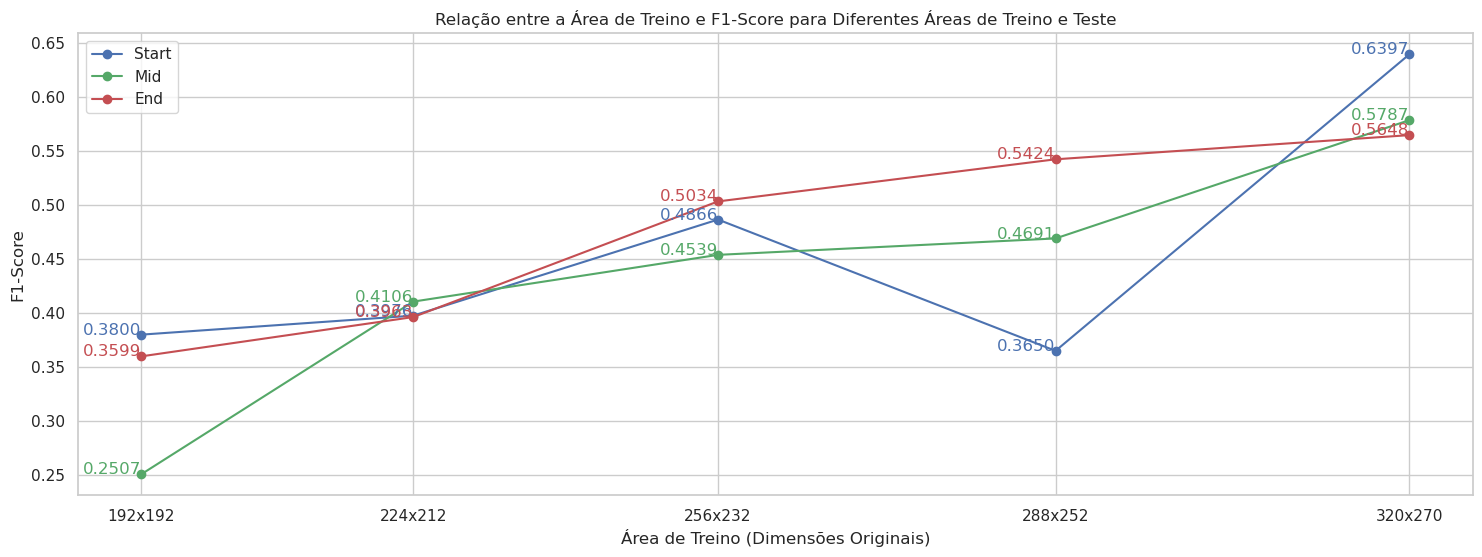

In [22]:
fixed_val_and_test_f1_graph()

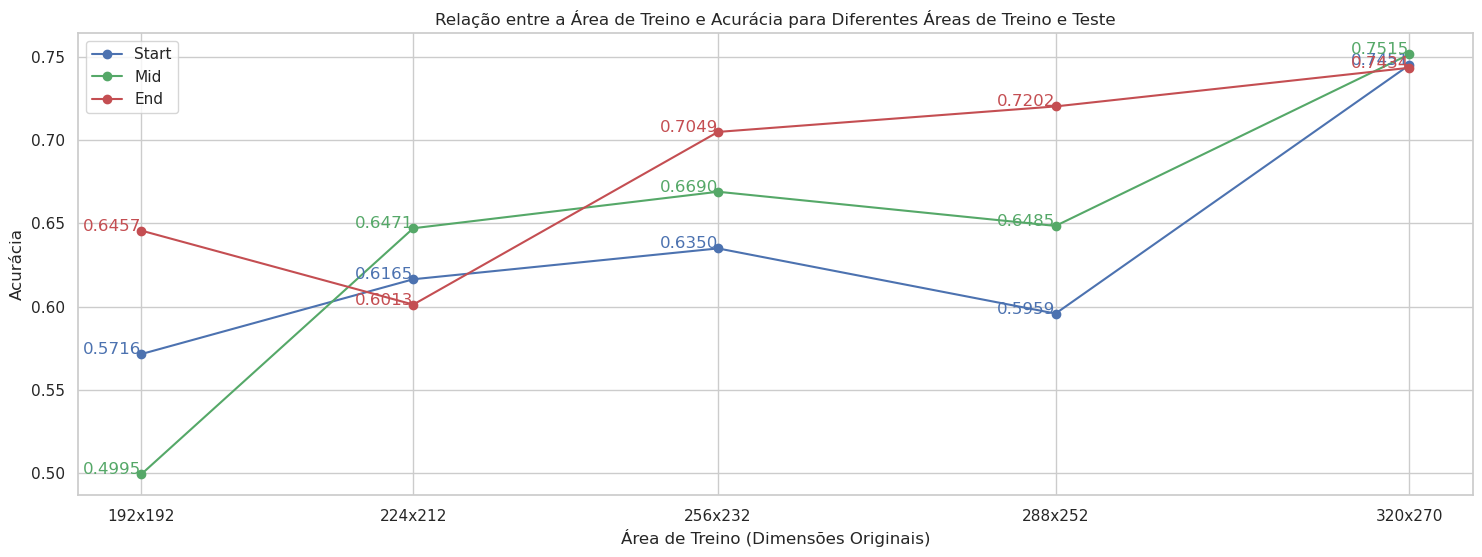

In [23]:
fixed_val_and_test_acc_graph()

## Data division with train area and slices

### Functions

In [24]:
def show_smart_data_division(size_x=192,size_y=192,num_train=10):
    total_area=782*590
    inicio_area_livre_x=size_x+80
    fim_area_livre_x=782
    inicio_area_livre_y=size_y+80
    fim_area_livre_y=590

    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    plt.grid(False)

    ax.imshow(np.ones([782,590]), cmap='gray', alpha=0.5)

    # Train data
    train_area=size_y * size_x
    rect = patches.Rectangle((0, 0), size_y, size_x, linewidth=2, edgecolor='purple', facecolor='purple', alpha=0.5)
    ax.add_patch(rect)


    x_limits = get_limits(inicio_area_livre_x, fim_area_livre_x, num_train)
    y_limits = get_limits(inicio_area_livre_y, fim_area_livre_y, num_train)
    
    added_train_area=0
    for pos_x, pos_y in zip(x_limits, y_limits):
        added_train_area+=pos_y
        added_train_area+=pos_x
        rect = patches.Rectangle((pos_y, 0), 2, pos_x, linewidth=2, edgecolor='none', facecolor='purple', alpha=1)
        ax.add_patch(rect)

        rect = patches.Rectangle((0, pos_x), pos_y+2, 2, linewidth=2, edgecolor='none', facecolor='purple', alpha=1)
        ax.add_patch(rect)
    print("Train Area:",  str((train_area + added_train_area)/ total_area))

    # Validation data
    val_area=size_y*80+size_x*80+80*80
    print("Validation Area:", str(val_area/ total_area))
    rect = patches.Rectangle((size_y, 0), 80, size_x, linewidth=2, edgecolor='none', facecolor='b', alpha=0.5)
    ax.add_patch(rect)

    rect = patches.Rectangle((0, size_x), size_y+80, 80, linewidth=2, edgecolor='none', facecolor='b', alpha=0.5)
    ax.add_patch(rect)

    #Test
    test_area=(fim_area_livre_x-inicio_area_livre_x)*590 + (fim_area_livre_y-inicio_area_livre_y)*(size_x+80)
    print("Test Area:", str((test_area-added_train_area)/total_area))
    rect = patches.Rectangle((inicio_area_livre_y, 0), fim_area_livre_y-inicio_area_livre_y, inicio_area_livre_x, linewidth=2, edgecolor='none', facecolor='yellow', alpha=0.5)
    ax.add_patch(rect)

    rect = patches.Rectangle((0, inicio_area_livre_x), 590, fim_area_livre_x-inicio_area_livre_x, linewidth=2, edgecolor='none', facecolor='yellow', alpha=0.5)
    ax.add_patch(rect)


    # Add legend
    train_patch = patches.Patch(color='purple', label='Training')
    val_patch = patches.Patch(color='b', label='Validation')
    test_patch = patches.Patch(color='yellow', label='Test')



    ax.legend(handles=[train_patch, val_patch, test_patch], loc='upper right')

    ax.set_xlim(0, 590)
    ax.set_ylim(782, 0)
    ax.set_title('Data Division')
    plt.show()

In [25]:
def show_smart_data_division_subplot(size_x=235, size_y=216):
    num_train_values = [1, 3, 7, 15, 31, 63]  # Different num_train values
    
    # Create subplots: 1 row, 6 columns
    fig, axs = plt.subplots(1, 6, figsize=(20, 6))
    plt.grid(False)
    
    inicio_area_livre_x = size_x + 80
    fim_area_livre_x = 782
    inicio_area_livre_y = size_y + 80
    fim_area_livre_y = 590

    for ax, num_train in zip(axs, num_train_values):
        ax.grid(False)
        ax.imshow(np.ones([782, 590]), cmap='gray', alpha=0.5)

        # Train data
        rect = patches.Rectangle((0, 0), size_y, size_x, linewidth=2, edgecolor='purple', facecolor='purple', alpha=0.5)
        ax.add_patch(rect)

        # Get train limits
        x_limits = get_limits(inicio_area_livre_x, fim_area_livre_x, num_train)
        y_limits = get_limits(inicio_area_livre_y, fim_area_livre_y, num_train)

        # Add purple rectangles for each position
        for pos_x, pos_y in zip(x_limits, y_limits):
            rect = patches.Rectangle((pos_y, 0), 2, pos_x, linewidth=2, edgecolor='none', facecolor='purple', alpha=1)
            ax.add_patch(rect)
            rect = patches.Rectangle((0, pos_x), pos_y + 2, 2, linewidth=2, edgecolor='none', facecolor='purple', alpha=1)
            ax.add_patch(rect)

        # Validation data
        rect = patches.Rectangle((size_y, 0), 80, size_x, linewidth=2, edgecolor='none', facecolor='b', alpha=0.5)
        ax.add_patch(rect)
        rect = patches.Rectangle((0, size_x), size_y + 80, 80, linewidth=2, edgecolor='none', facecolor='b', alpha=0.5)
        ax.add_patch(rect)

        # Test data
        rect = patches.Rectangle((inicio_area_livre_y, 0), fim_area_livre_y - inicio_area_livre_y, inicio_area_livre_x, linewidth=2, edgecolor='none', facecolor='yellow', alpha=0.5)
        ax.add_patch(rect)
        rect = patches.Rectangle((0, inicio_area_livre_x), 590, fim_area_livre_x - inicio_area_livre_x, linewidth=2, edgecolor='none', facecolor='yellow', alpha=0.5)
        ax.add_patch(rect)

        # Set title for each subplot
        ax.set_title(f'Num subdivisions: {num_train+1}')
        ax.set_xlim(0, 590)
        ax.set_ylim(782, 0)

    # Add legend to the last subplot
    train_patch = patches.Patch(color='purple', label='Training')
    val_patch = patches.Patch(color='b', label='Validation')
    test_patch = patches.Patch(color='yellow', label='Test')
    axs[-1].legend(handles=[train_patch, val_patch, test_patch], loc='upper right')

    plt.tight_layout()
    plt.show()


In [26]:
# Define the path to your directory containing the files
directory_path = '/home/nunes/Seismic_Analysis_Tensorflow/results/train_slices_in_test_area/tables'

# Initialize dictionaries to store the F1 scores for each area and slice count
f1_scores_1_dict = {}
f1_scores_3_dict = {}
f1_scores_7_dict = {}
f1_scores_15_dict = {}
f1_scores_31_dict = {}
f1_scores_63_dict = {}

# Iterate over all files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith(".txt"):
        # Construct the full path to the file
        file_path = os.path.join(directory_path, filename)
        
        # Extract the area and slice count from the filename
        match = re.match(r'table_(\d+x\d+)_(\d+)_slice\.txt', filename)
        if match:
            area = match.group(1)
            slice_count = int(match.group(2))

            # Read the file and search for the line containing "Macro F1"
            with open(file_path, 'r') as file:
                for line in file:
                    if 'Micro F1' in line:
                        # Extract the F1 score value
                        f1_value = float(line.split()[2])
                        
                        # Append the value to the corresponding list based on slice count
                        if slice_count == 1:
                            f1_scores_1_dict.setdefault(area, []).append(f1_value)
                        elif slice_count == 3:
                            f1_scores_3_dict.setdefault(area, []).append(f1_value)
                        elif slice_count == 7:
                            f1_scores_7_dict.setdefault(area, []).append(f1_value)
                        elif slice_count == 15:
                            f1_scores_15_dict.setdefault(area, []).append(f1_value)
                        elif slice_count == 31:
                            f1_scores_31_dict.setdefault(area, []).append(f1_value)
                        elif slice_count == 63:
                            f1_scores_63_dict.setdefault(area, []).append(f1_value)

In [27]:
def train_area_and_slices_results_graph():
    # Listas de áreas e múltiplas listas de F1 scores
    areas = ['192x192', '235x216', '278x240', '321x264', '364x288', '407x312', '450x336', '493x360', '536x384','579x408']#,'622x430']

    # Três diferentes listas de F1 scores
    f1_slice_1=values_dict_to_list(f1_scores_1_dict)[:10]
    f1_slice_3=values_dict_to_list(f1_scores_3_dict)[:10]
    f1_slice_7=values_dict_to_list(f1_scores_7_dict)[:10]
    f1_slice_15=values_dict_to_list(f1_scores_15_dict)[:10]
    f1_slice_31=values_dict_to_list(f1_scores_31_dict)[:10]
    f1_slice_63=values_dict_to_list(f1_scores_63_dict)[:10]



    # Convertendo áreas para uma métrica numérica
    areas_numerical = [int(area.split('x')[0]) * int(area.split('x')[1]) for area in areas]

    # Configurando o estilo do gráfico
    sns.set(style="whitegrid")

    # Criando o gráfico de linha
    plt.figure(figsize=(18, 6))

    # Plotando as três listas de F1 scores com cores diferentes
    plt.plot(areas_numerical, f1_slice_1, marker='o', linestyle='-', color='r', label='2 Subdivision')
    plt.plot(areas_numerical, f1_slice_3, marker='o', linestyle='-', color='orange', label='4 Subdivisions')
    plt.plot(areas_numerical, f1_slice_7, marker='o', linestyle='-', color='yellow', label='8 Subdivisions')
    plt.plot(areas_numerical, f1_slice_15, marker='o', linestyle='-', color='g', label='16 Subdivisions')
    plt.plot(areas_numerical, f1_slice_31, marker='o', linestyle='-', color='b', label='32 Subdivisions')
    plt.plot(areas_numerical, f1_slice_63, marker='o', linestyle='-', color='purple', label='64 Subdivisions')


    # Adicionando os valores de F1 no gráfico para cada linha
    for i, (area, f1_1, f1_3, f1_7,f1_15,f1_31,f1_63) in enumerate(zip(areas_numerical, f1_slice_1, f1_slice_3, f1_slice_7,f1_slice_15,f1_slice_31,f1_slice_63)):
        plt.text(area, f1_1, f'{f1_1:.3f}', fontsize=12, ha='right', color='r')
        plt.text(area, f1_3, f'{f1_3:.3f}', fontsize=12, ha='right', color='orange')
        plt.text(area, f1_7, f'{f1_7:.3f}', fontsize=12, ha='right', color='yellow')
        plt.text(area, f1_15, f'{f1_15:.3f}', fontsize=12, ha='right', color='g')
        plt.text(area, f1_31, f'{f1_31:.3f}', fontsize=12, ha='right', color='b')
        plt.text(area, f1_63, f'{f1_63:.3f}', fontsize=12, ha='right', color='purple')

    # Ajustando os labels do eixo x para mostrar as áreas originais
    plt.xticks(areas_numerical, areas)

    # Títulos e labels
    plt.title('Relação entre a Área de Treino e F1-Score para Diferentes Áreas de Treino e Teste')
    plt.xlabel('Área de Treino (Dimensões Originais)')
    plt.ylabel('F1-Score')

    # Adicionando legenda
    plt.legend()

    # Exibindo o gráfico
    plt.show()


In [28]:
def display_table_subdivisions():
    areas = ['192x192', '235x216', '278x240', '321x264', '364x288', '407x312', '450x336', '493x360', '536x384','579x408']#,'622x430']
    # Create a dictionary to store the table data
    f1_slice_1=values_dict_to_list(f1_scores_1_dict)[:10]
    f1_slice_3=values_dict_to_list(f1_scores_3_dict)[:10]
    f1_slice_7=values_dict_to_list(f1_scores_7_dict)[:10]
    f1_slice_15=values_dict_to_list(f1_scores_15_dict)[:10]
    f1_slice_31=values_dict_to_list(f1_scores_31_dict)[:10]
    f1_slice_63=values_dict_to_list(f1_scores_63_dict)[:10]
    table_data = {
        'Subdivisions': ['2 Subdivisions', '4 Subdivisions', '8 Subdivisions', '16 Subdivisions', '32 Subdivisions', '64 Subdivisions']
    }
    
    # Loop through each area and add the corresponding data to the dictionary
    for i, area in enumerate(areas):
        table_data[area] = [
            f'{f1_slice_1[i]:.3f}',  # F1 score for 2 Subdivisions
            f'{f1_slice_3[i]:.3f}',  # F1 score for 4 Subdivisions
            f'{f1_slice_7[i]:.3f}',  # F1 score for 8 Subdivisions
            f'{f1_slice_15[i]:.3f}',  # F1 score for 16 Subdivisions
            f'{f1_slice_31[i]:.3f}',  # F1 score for 32 Subdivisions
            f'{f1_slice_63[i]:.3f}'   # F1 score for 64 Subdivisions
        ]
    
    # Convert the dictionary to a pandas DataFrame
    df = pd.DataFrame(table_data)
    return df

### Results

Train Area: 0.10064155360006936
Validation Area: 0.08045428930599506
Test Area: 0.8189041570939356


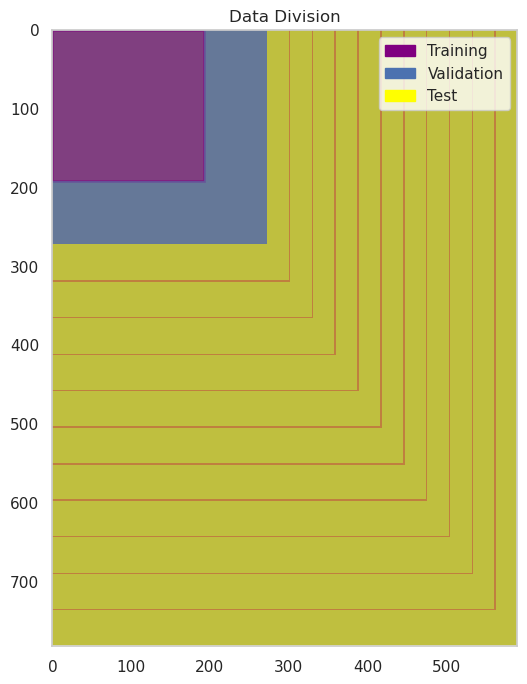

In [29]:
show_smart_data_division(size_x=192,size_y=192,num_train=10)

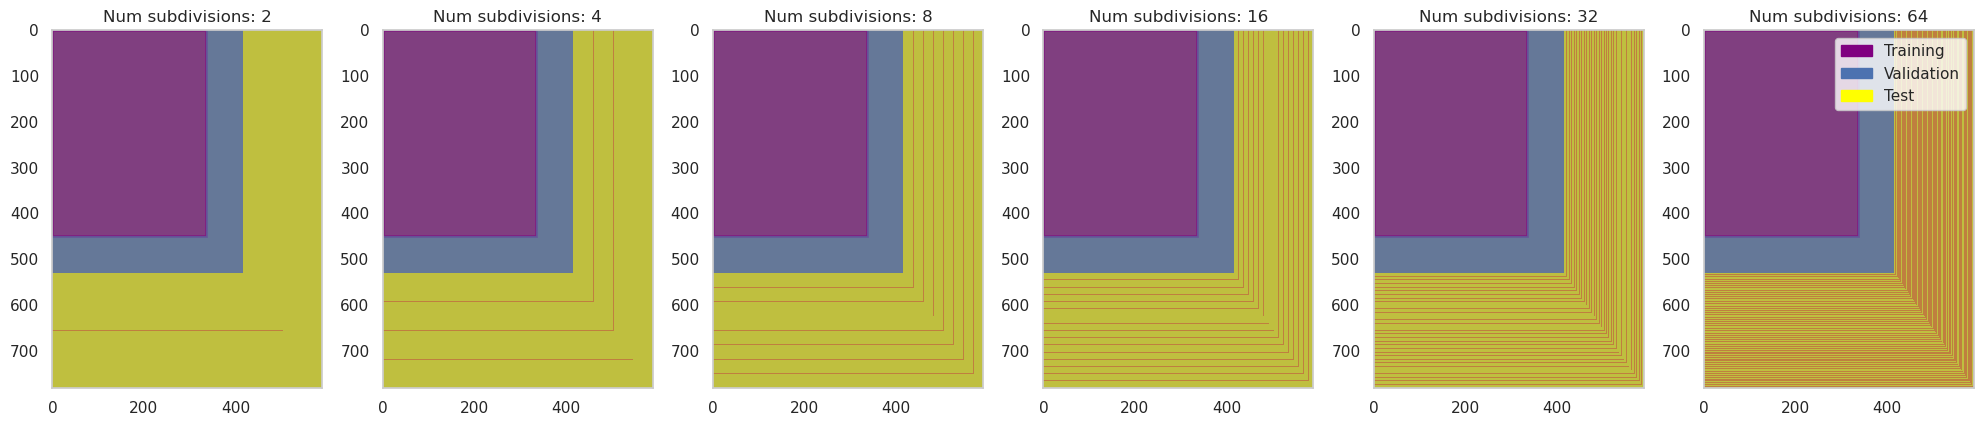

In [30]:
show_smart_data_division_subplot(450,336)

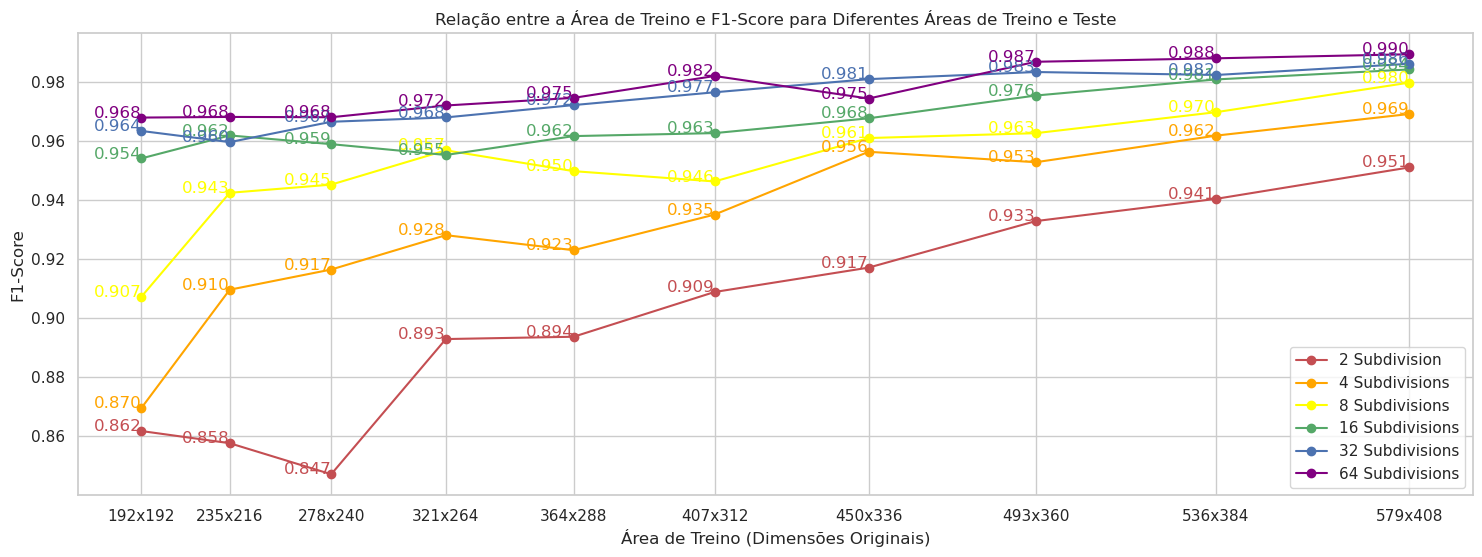

In [31]:
train_area_and_slices_results_graph()

In [32]:
display_table_subdivisions()

,Subdivisions,192x192,235x216,278x240,321x264,364x288,407x312,450x336,493x360,536x384,579x408
0,2 Subdivisions,0.862,0.858,0.847,0.893,0.894,0.909,0.917,0.933,0.941,0.951
1,4 Subdivisions,0.870,0.910,0.917,0.928,0.923,0.935,0.956,0.953,0.962,0.969
2,8 Subdivisions,0.907,0.943,0.945,0.957,0.950,0.946,0.961,0.963,0.970,0.980
3,16 Subdivisions,0.954,0.962,0.959,0.955,0.962,0.963,0.968,0.976,0.981,0.984
4,32 Subdivisions,0.964,0.960,0.967,0.968,0.972,0.977,0.981,0.983,0.982,0.986
5,64 Subdivisions,0.968,0.968,0.968,0.972,0.975,0.982,0.975,0.987,0.988,0.990


## Data division with only slices for training

### Functions

In [33]:
def show_slices_for_training_data_division(num_train=10):
    total_area=782*590
    inicio_area_livre_x=0
    fim_area_livre_x=782
    inicio_area_livre_y=0
    fim_area_livre_y=590

    fig, ax = plt.subplots(1, 1, figsize=(18, 12))
    plt.grid(False)

    ax.imshow(np.ones([782,590]), cmap='gray', alpha=0.5)


    x_limits = get_limits(inicio_area_livre_x, fim_area_livre_x, num_train)
    y_limits = get_limits(inicio_area_livre_y, fim_area_livre_y, num_train)
    
    train_area=0
    for pos_x, pos_y in zip(x_limits, y_limits):
        train_area+=782
        train_area+=590
        rect = patches.Rectangle((pos_y, 0), 2, fim_area_livre_x, linewidth=2, edgecolor='none', facecolor='red', alpha=1)
        ax.add_patch(rect)

        rect = patches.Rectangle((0, pos_x), fim_area_livre_y, 2, linewidth=2, edgecolor='none', facecolor='red', alpha=1)
        ax.add_patch(rect)

    val_area=0
    for pos_x, pos_y in zip(x_limits, y_limits):
        val_area+=782
        val_area+=590
        rect = patches.Rectangle((pos_y+2, 0), 2, fim_area_livre_x, linewidth=2, edgecolor='none', facecolor='blue', alpha=1)
        ax.add_patch(rect)

        rect = patches.Rectangle((0, pos_x+2), fim_area_livre_y, 2, linewidth=2, edgecolor='none', facecolor='blue', alpha=1)
        ax.add_patch(rect)


    #Test
    test_area=total_area-train_area-val_area
    rect = patches.Rectangle((inicio_area_livre_y, 0), fim_area_livre_y-inicio_area_livre_y, inicio_area_livre_x, linewidth=2, edgecolor='none', facecolor='yellow', alpha=0.5)
    ax.add_patch(rect)

    rect = patches.Rectangle((0, inicio_area_livre_x), 590, fim_area_livre_x-inicio_area_livre_x, linewidth=2, edgecolor='none', facecolor='yellow', alpha=0.5)
    ax.add_patch(rect)


    # Add legend
    train_patch = patches.Patch(color='red', label='Training')
    val_patch = patches.Patch(color='b', label='Validation')
    test_patch = patches.Patch(color='yellow', label='Test')


    print("Train Area:",  str((train_area)/ total_area))
    print("Validation Area:",  str((val_area)/ total_area))
    print("Test Area:",  str((test_area)/ total_area))
    ax.legend(handles=[train_patch, val_patch, test_patch], loc='upper right')

    ax.set_xlim(0, 590)
    ax.set_ylim(782, 0)
    ax.set_title('Data Division with '+ str(num_train)+" Vertical and Horizontal Slices")
    plt.show()

In [34]:
def extrair_metricas_dos_arquivos(diretorio):
    # Dicionários para armazenar os valores de Macro F1 e Micro F1 para cada slice
    macro_f1_scores = {}
    micro_f1_scores = {}

    # Expressões regulares para identificar as linhas de Macro e Micro F1
    macro_f1_pattern = re.compile(r'Macro F1 ([\d.]+)')
    micro_f1_pattern = re.compile(r'Micro F1 ([\d.]+)')

    # Percorre todos os arquivos no diretório fornecido
    for filename in os.listdir(diretorio):
        if filename.startswith("table_") and filename.endswith("_slice.txt"):
            # Extrai o número do slice do nome do arquivo
            slice_number = int(re.search(r'table_(\d+)_slice', filename).group(1))

            # Abre e lê o conteúdo do arquivo
            with open(os.path.join(diretorio, filename), 'r') as file:
                content = file.read()

                # Procura os valores de Macro F1 e Micro F1 no arquivo
                macro_f1_match = macro_f1_pattern.search(content)
                micro_f1_match = micro_f1_pattern.search(content)

                if macro_f1_match and micro_f1_match:
                    macro_f1_score = float(macro_f1_match.group(1))
                    micro_f1_score = float(micro_f1_match.group(1))

                    # Armazena os valores nos dicionários
                    macro_f1_scores[slice_number] = macro_f1_score
                    micro_f1_scores[slice_number] = micro_f1_score

    return macro_f1_scores, micro_f1_scores

def plotar_metricas(macro_f1_scores, micro_f1_scores):
    # Ordena os dicionários por chave (número de slices)
    slices = sorted(macro_f1_scores.keys())
    macro_f1_values = [macro_f1_scores[slice] for slice in slices]
    micro_f1_values = [micro_f1_scores[slice] for slice in slices]

    # Criar gráfico para Macro F1
    plt.figure(figsize=(18, 6))
    plt.plot(slices, macro_f1_values, marker='o', label='F1-Score')
    plt.title('Relação entre F1-Score e Número de Slices para Treino')
    plt.xlabel('Número de Slices')
    plt.ylabel('F1-Score')
    plt.grid(True)
    
    # Adicionar valores nos pontos
    for i, value in enumerate(macro_f1_values):
        if(i%4==0):
            plt.text(slices[i], value, f'{value:.4f}', ha='left', va='bottom')

    plt.legend()
    plt.show()

    # Criar gráfico para Micro F1
    plt.figure(figsize=(18, 6))
    plt.plot(slices, micro_f1_values, marker='o', color='orange', label='Acurácia')
    plt.title('Relação entre Acurácia e Número de Slices para Treino')
    plt.xlabel('Número de Slices')
    plt.ylabel('Acurácia')
    plt.grid(True)
    
    # Adicionar valores nos pontos
    for i, value in enumerate(micro_f1_values):
        if(i%4==0):
            plt.text(slices[i], value, f'{value:.3f}', ha='left', va='bottom')

    plt.legend()
    plt.show()


# Função principal
def analisar_metricas(diretorio):
    macro_f1_scores, micro_f1_scores = extrair_metricas_dos_arquivos(diretorio)
    plotar_metricas(macro_f1_scores, micro_f1_scores)


def gerar_tabela(macro_f1_scores, micro_f1_scores):
    # Cria um DataFrame a partir dos dicionários de scores, com slices como colunas
    data = {
        'Metric': ['F1-Score', 'Acurácia'],
    }
    
    # Adiciona as colunas para cada slice
    for slice in range(91,101):
        data[slice] = [f'{macro_f1_scores[slice]:.3f}', f'{micro_f1_scores[slice]:.3f}']

    # Usando pandas para criar a tabela
    df = pd.DataFrame(data)
    return df

### Results

In [35]:
micro, macro=extrair_metricas_dos_arquivos('/home/nunes/Seismic_Analysis_Tensorflow/results/only_train_slices/tables')
gerar_tabela(micro,macro)

,Metric,91,92,93,94,95,96,97,98,99,100
0,F1-Score,0.885,0.891,0.895,0.893,0.897,0.905,0.887,0.898,0.896,0.781
1,Acurácia,0.952,0.952,0.955,0.952,0.956,0.955,0.952,0.953,0.952,0.947


Train Area: 0.10407906714638693
Validation Area: 0.10407906714638693
Test Area: 0.7918418657072261


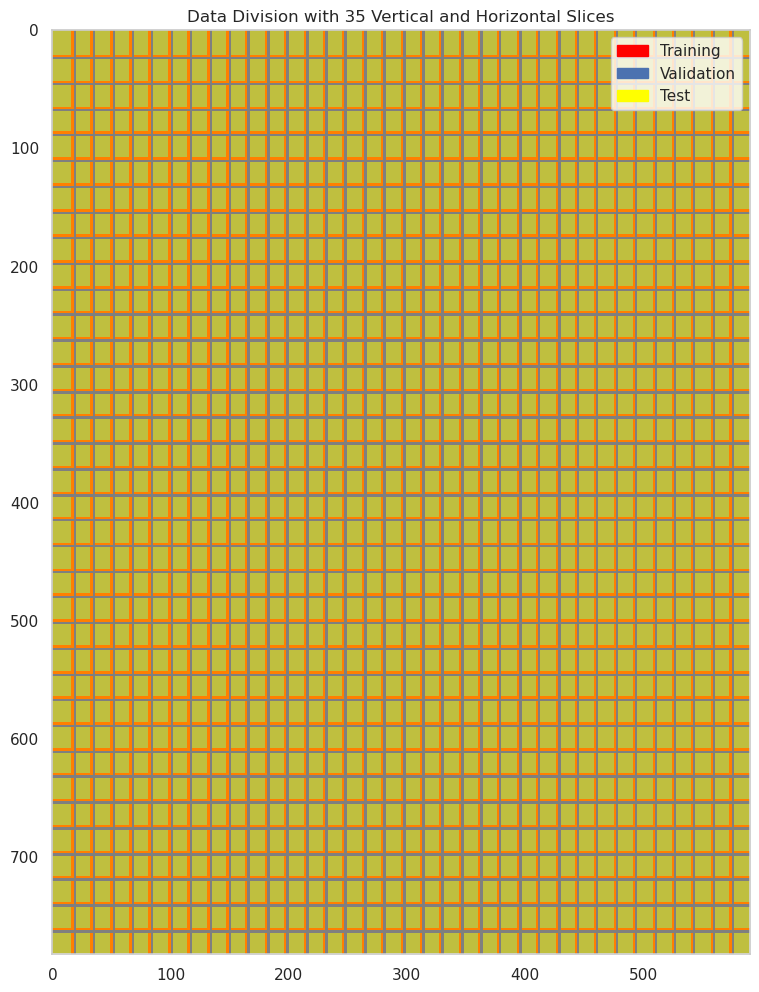

In [36]:
show_slices_for_training_data_division(num_train=35)

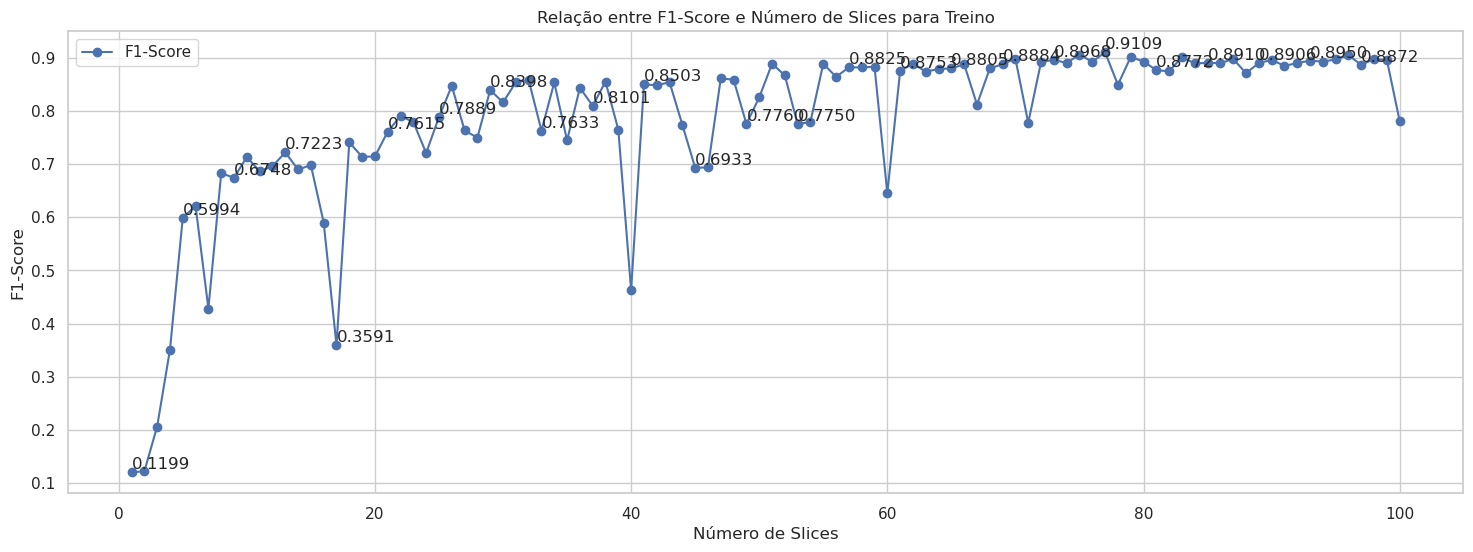

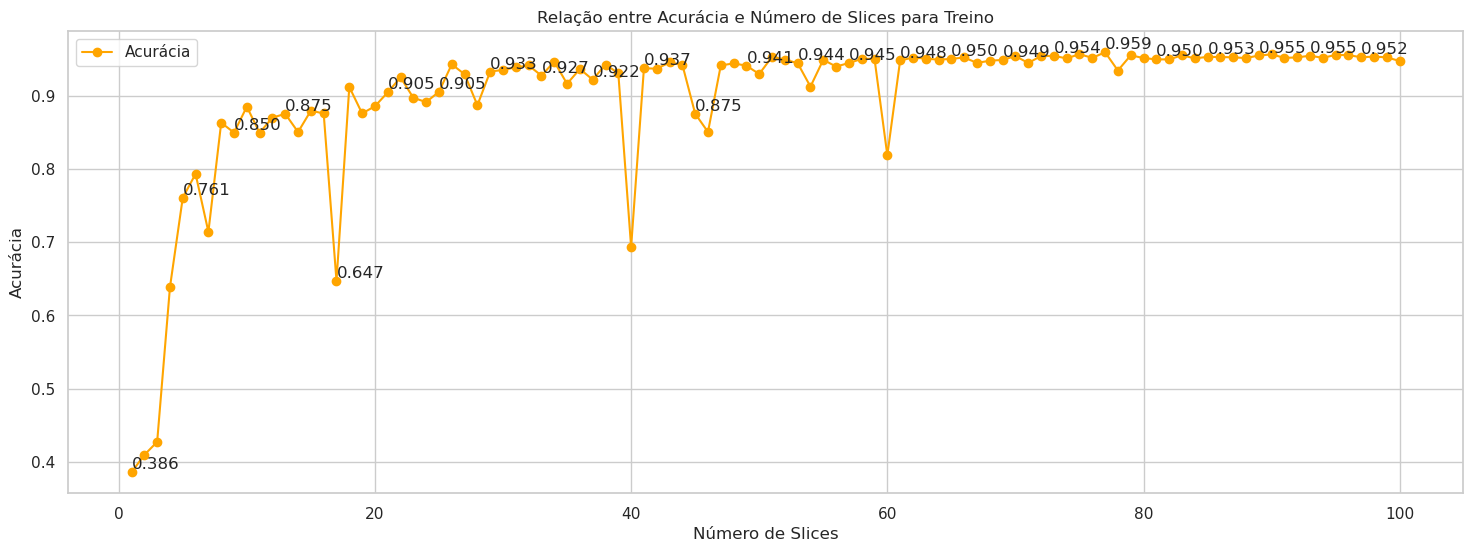

In [37]:
analisar_metricas('/home/nunes/Seismic_Analysis_Tensorflow/results/only_train_slices/tables')